In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-mumu-mZ8500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-8500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-8500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-8500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-8500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-8500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-8500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-8500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-8500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-8500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-8500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-8500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-8500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()



# 3rd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-8500-3.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-8500-3.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-8500-3.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-8500-3.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-8500-3.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-8500-3.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-3.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()





# 4th DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-8500-4.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-8500-4.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-8500-4.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-8500-4.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-8500-4.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-8500-4.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mmumu-4.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

613589
612822
613440
614067


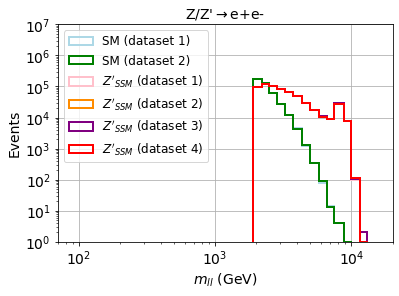

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/mumu/"

invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 2)")


folder_saved = "Zprime-SSM-mumu-mZ8500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mmumu-3.txt", delimiter=',')
invariant_mass_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved +"mmumu-4.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")
plt.hist(invariant_mass_eeSSMZprime_3, bins=bins_atlas, lw=2, edgecolor='purple', histtype='step', label="$Z'_{SSM}$ (dataset 3)")
plt.hist(invariant_mass_eeSSMZprime_4, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$ (dataset 4)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/mumu/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mmumu-1800.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.65 or e1eta_eeSM[i] > 2.65 or e2eta_eeSM[i] < -2.65 or e2eta_eeSM[i] > 2.65:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mmumu-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_pt_events_IM_1800_2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_eta_events_IM_1800_2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu1_phi_events_IM_1800_2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_pt_events_IM_1800_2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_eta_events_IM_1800_2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'mu2_phi_events_IM_1800_2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.65 or e1eta_eeSM_1800[i] > 2.65 or e2eta_eeSM_1800[i] < -2.65 or e2eta_eeSM_1800[i] > 2.65:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800




# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)
(804774,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.646
2.648
-2.649
2.649


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-mumu-mZ8500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mmumu-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-pt-8500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-eta-8500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu1-phi-8500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-pt-8500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-eta-8500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'mu2-phi-8500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.65 or e1eta_eeSSMZprime[i] > 2.65 or e2eta_eeSSMZprime[i] < -2.65 or e2eta_eeSSMZprime[i] > 2.65:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)

        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mmumu-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-pt-8500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-eta-8500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu1-phi-8500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-pt-8500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-eta-8500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'mu2-phi-8500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.65 or e1eta_eeSSMZprime_2[i] > 2.65 or e2eta_eeSSMZprime_2[i] < -2.65 or e2eta_eeSSMZprime_2[i] > 2.65:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 1000000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2






# 3rd DATASET
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mmumu-3.txt", delimiter=',')

e1pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'mu1-pt-8500-3.txt', delimiter=',')
e1eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'mu1-eta-8500-3.txt', delimiter=',')
e1phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'mu1-phi-8500-3.txt', delimiter=',')

e2pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'mu2-pt-8500-3.txt', delimiter=',')
e2eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'mu2-eta-8500-3.txt', delimiter=',')
e2phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'mu2-phi-8500-3.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime_3))):
    if invariant_mass_eeSSMZprime_3[i]< 2000 or e1eta_eeSSMZprime_3[i] < -2.65 or e1eta_eeSSMZprime_3[i] > 2.65 or e2eta_eeSSMZprime_3[i] < -2.65 or e2eta_eeSSMZprime_3[i] > 2.65:
        e1pt_eeSSMZprime_3 = np.delete(e1pt_eeSSMZprime_3, i)
        e1eta_eeSSMZprime_3 = np.delete(e1eta_eeSSMZprime_3, i)
        e1phi_eeSSMZprime_3 = np.delete(e1phi_eeSSMZprime_3, i)
        
        e2pt_eeSSMZprime_3 = np.delete(e2pt_eeSSMZprime_3, i)
        e2eta_eeSSMZprime_3 = np.delete(e2eta_eeSSMZprime_3, i)
        e2phi_eeSSMZprime_3 = np.delete(e2phi_eeSSMZprime_3, i)
        
        invariant_mass_eeSSMZprime_3 = np.delete(invariant_mass_eeSSMZprime_3, i)
        
eventos_parton = 1000000
aceptancia_eeSSMZprime_3 = 1.*len(invariant_mass_eeSSMZprime_3) / eventos_parton
print(aceptancia_eeSSMZprime_3)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_3])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_3])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_3])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_3])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_3])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_3])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_3])



# remove the aux
del e1pt_eeSSMZprime_3
del e1eta_eeSSMZprime_3
del e1phi_eeSSMZprime_3

del e2pt_eeSSMZprime_3
del e2eta_eeSSMZprime_3
del e2phi_eeSSMZprime_3

del invariant_mass_eeSSMZprime_3









# 4th DATASET
invariant_mass_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved +"mmumu-4.txt", delimiter=',')

e1pt_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'mu1-pt-8500-4.txt', delimiter=',')
e1eta_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'mu1-eta-8500-4.txt', delimiter=',')
e1phi_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'mu1-phi-8500-4.txt', delimiter=',')

e2pt_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'mu2-pt-8500-4.txt', delimiter=',')
e2eta_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'mu2-eta-8500-4.txt', delimiter=',')
e2phi_eeSSMZprime_4 = np.loadtxt(folder_data + folder_saved + 'mu2-phi-8500-4.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.65
for i in reversed(range(len(invariant_mass_eeSSMZprime_4))):
    if invariant_mass_eeSSMZprime_4[i]< 2000 or e1eta_eeSSMZprime_4[i] < -2.65 or e1eta_eeSSMZprime_4[i] > 2.65 or e2eta_eeSSMZprime_4[i] < -2.65 or e2eta_eeSSMZprime_4[i] > 2.65:
        e1pt_eeSSMZprime_4 = np.delete(e1pt_eeSSMZprime_4, i)
        e1eta_eeSSMZprime_4 = np.delete(e1eta_eeSSMZprime_4, i)
        e1phi_eeSSMZprime_4 = np.delete(e1phi_eeSSMZprime_4, i)
        
        e2pt_eeSSMZprime_4 = np.delete(e2pt_eeSSMZprime_4, i)
        e2eta_eeSSMZprime_4 = np.delete(e2eta_eeSSMZprime_4, i)
        e2phi_eeSSMZprime_4 = np.delete(e2phi_eeSSMZprime_4, i)
        
        invariant_mass_eeSSMZprime_4 = np.delete(invariant_mass_eeSSMZprime_4, i)
        
eventos_parton = 1000000
aceptancia_eeSSMZprime_4 = 1.*len(invariant_mass_eeSSMZprime_4) / eventos_parton
print(aceptancia_eeSSMZprime_4)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_4])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_4])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_4])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_4])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_4])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_4])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_4])



# remove the aux
del e1pt_eeSSMZprime_4
del e1eta_eeSSMZprime_4
del e1phi_eeSSMZprime_4

del e2pt_eeSSMZprime_4
del e2eta_eeSSMZprime_4
del e2phi_eeSSMZprime_4

del invariant_mass_eeSSMZprime_4







# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.612787
0.613415
0.614036
(2453796,)
(2453796,)
(2453796,)
(2453796,)
(2453796,)
(2453796,)
(2453796,)
(2453796,)
(2453796,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.648
2.649
-2.649
2.649


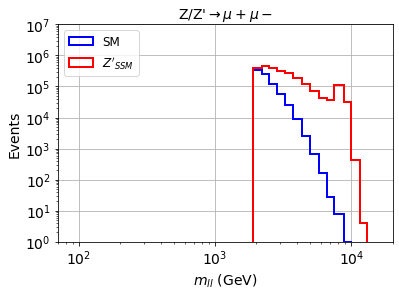

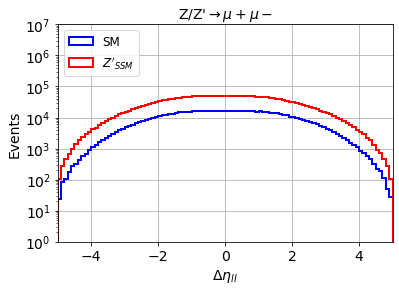

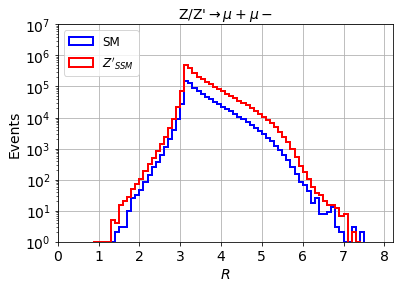

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.172677  0.591235  0.081158  0.207728  0.609664  0.557288  0.030301   
1        0.168554  0.636759  0.312540  0.197598  0.353341  0.827976  0.092821   
2        0.227899  0.703627  0.972311  0.258808  0.502831  0.473265  0.138332   
3        0.158677  0.581224  0.581158  0.173313  0.567573  0.101528  0.002171   
4        0.140409  0.544012  0.273711  0.180223  0.285957  0.765595  0.046718   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.171244  0.703627  0.039624  0.187495  0.506984  0.533577  0.050761   
1499996  0.091139  0.826785  0.250318  0.121658  0.476595  0.749204  0.000569   
1499997  0.155649  0.591802  0.776894  0.097360  0.155342  0.337842  0.073360   
1499998  0.246667  0.780884  0.057607  0.301400  0.197999  0.559835  0.629148   
1499999  0.233620  0.670759  0.351369  0.284496  0.561344  0.875557  0.124364   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67901	validation_1-logloss:0.67921
[1]	validation_0-logloss:0.66717	validation_1-logloss:0.66737
[2]	validation_0-logloss:0.65731	validation_1-logloss:0.65760
[3]	validation_0-logloss:0.64907	validation_1-logloss:0.64944
[4]	validation_0-logloss:0.64197	validation_1-logloss:0.64246
[5]	validation_0-logloss:0.63598	validation_1-logloss:0.63657
[6]	validation_0-logloss:0.63082	validation_1-logloss:0.63143
[7]	validation_0-logloss:0.62637	validation_1-logloss:0.62710
[8]	validation_0-logloss:0.62255	validation_1-logloss:0.62333
[9]	validation_0-logloss:0.61914	validation_1-logloss:0.61994
[10]	validation_0-logloss:0.61617	validation_1-logloss:0.61704
[11]	validation_0-logloss:0.61349	validation_1-logloss:0.61445
[12]	validation_0-logloss:0.61103	validation_1-logloss:0.61204
[13]	validation_0-logloss:0.60903	validation_1-logloss:0.61011
[14]	validation_0-logloss:0.60713	validation_1-logloss:0.60824
[15]	validation_0-logloss:0.60528	validation_1-logloss:0.60647
[1

[130]	validation_0-logloss:0.57033	validation_1-logloss:0.57375
[131]	validation_0-logloss:0.57030	validation_1-logloss:0.57374
[132]	validation_0-logloss:0.57026	validation_1-logloss:0.57372
[133]	validation_0-logloss:0.57024	validation_1-logloss:0.57372
[134]	validation_0-logloss:0.57020	validation_1-logloss:0.57370
[135]	validation_0-logloss:0.57016	validation_1-logloss:0.57367
[136]	validation_0-logloss:0.57013	validation_1-logloss:0.57366
[137]	validation_0-logloss:0.57010	validation_1-logloss:0.57366
[138]	validation_0-logloss:0.57008	validation_1-logloss:0.57364
[139]	validation_0-logloss:0.57006	validation_1-logloss:0.57364
[140]	validation_0-logloss:0.57003	validation_1-logloss:0.57363
[141]	validation_0-logloss:0.57000	validation_1-logloss:0.57362
[142]	validation_0-logloss:0.56996	validation_1-logloss:0.57361
[143]	validation_0-logloss:0.56994	validation_1-logloss:0.57360
[144]	validation_0-logloss:0.56991	validation_1-logloss:0.57360
[145]	validation_0-logloss:0.56989	valid

[259]	validation_0-logloss:0.56755	validation_1-logloss:0.57313
[260]	validation_0-logloss:0.56755	validation_1-logloss:0.57313
[261]	validation_0-logloss:0.56755	validation_1-logloss:0.57313
[262]	validation_0-logloss:0.56753	validation_1-logloss:0.57313
[263]	validation_0-logloss:0.56751	validation_1-logloss:0.57313
[264]	validation_0-logloss:0.56749	validation_1-logloss:0.57312
[265]	validation_0-logloss:0.56747	validation_1-logloss:0.57312
[266]	validation_0-logloss:0.56745	validation_1-logloss:0.57313
[267]	validation_0-logloss:0.56741	validation_1-logloss:0.57311
[268]	validation_0-logloss:0.56740	validation_1-logloss:0.57311
[269]	validation_0-logloss:0.56738	validation_1-logloss:0.57311
[270]	validation_0-logloss:0.56737	validation_1-logloss:0.57311
[271]	validation_0-logloss:0.56735	validation_1-logloss:0.57312
[272]	validation_0-logloss:0.56733	validation_1-logloss:0.57311
[273]	validation_0-logloss:0.56731	validation_1-logloss:0.57311
[274]	validation_0-logloss:0.56730	valid

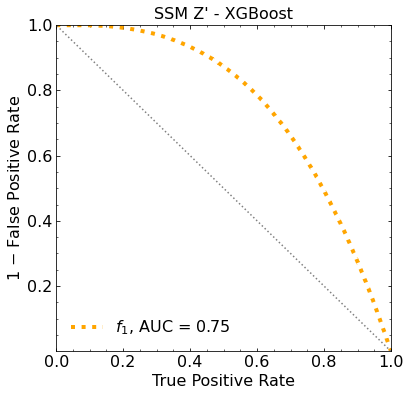

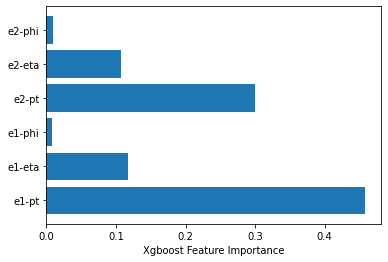

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67873	validation_1-logloss:0.67903
[1]	validation_0-logloss:0.66688	validation_1-logloss:0.66728
[2]	validation_0-logloss:0.65710	validation_1-logloss:0.65759
[3]	validation_0-logloss:0.64880	validation_1-logloss:0.64938
[4]	validation_0-logloss:0.64174	validation_1-logloss:0.64239
[5]	validation_0-logloss:0.63563	validation_1-logloss:0.63643
[6]	validation_0-logloss:0.63040	validation_1-logloss:0.63130
[7]	validation_0-logloss:0.62589	validation_1-logloss:0.62690
[8]	validation_0-logloss:0.62194	validation_1-logloss:0.62303
[9]	validation_0-logloss:0.61852	validation_1-logloss:0.61972
[10]	validation_0-logloss:0.61562	validation_1-logloss:0.61690
[11]	validation_0-logloss:0.61293	validation_1-logloss:0.61431
[12]	validation_0-logloss:0.61060	validation_1-logloss:0.61206
[13]	validation_0-logloss:0.60846	validation_1-logloss:0.60998
[14]	validation_0-logloss:0.60664	validation_1-logloss:0.60827
[15]	validation_0-logloss:0.60464	validation_1-logloss:0.60634
[1

[130]	validation_0-logloss:0.56822	validation_1-logloss:0.57424
[131]	validation_0-logloss:0.56817	validation_1-logloss:0.57423
[132]	validation_0-logloss:0.56808	validation_1-logloss:0.57418
[133]	validation_0-logloss:0.56802	validation_1-logloss:0.57417
[134]	validation_0-logloss:0.56799	validation_1-logloss:0.57416
[135]	validation_0-logloss:0.56794	validation_1-logloss:0.57415
[136]	validation_0-logloss:0.56789	validation_1-logloss:0.57412
[137]	validation_0-logloss:0.56785	validation_1-logloss:0.57412
[138]	validation_0-logloss:0.56782	validation_1-logloss:0.57412
[139]	validation_0-logloss:0.56780	validation_1-logloss:0.57410
[140]	validation_0-logloss:0.56775	validation_1-logloss:0.57410
[141]	validation_0-logloss:0.56771	validation_1-logloss:0.57410
[142]	validation_0-logloss:0.56765	validation_1-logloss:0.57410
[143]	validation_0-logloss:0.56762	validation_1-logloss:0.57409
[144]	validation_0-logloss:0.56758	validation_1-logloss:0.57409
[145]	validation_0-logloss:0.56754	valid

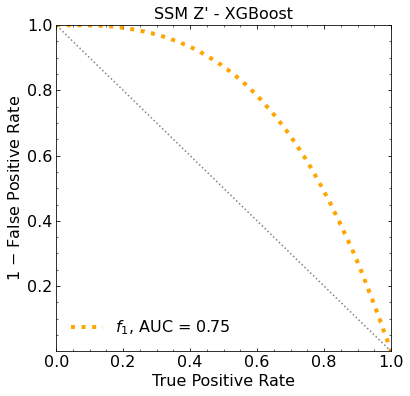


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67873	validation_1-logloss:0.67891
[1]	validation_0-logloss:0.66689	validation_1-logloss:0.66722
[2]	validation_0-logloss:0.65706	validation_1-logloss:0.65760
[3]	validation_0-logloss:0.64870	validation_1-logloss:0.64944
[4]	validation_0-logloss:0.64158	validation_1-logloss:0.64245
[5]	validation_0-logloss:0.63560	validation_1-logloss:0.63662
[6]	validation_0-logloss:0.63026	validation_1-logloss:0.63136
[7]	validation_0-logloss:0.62576	validation_1-logloss:0.62701
[8]	validation_0-logloss:0.62191	validation_1-logloss:0.62322
[9]	validation_0-logloss:0.61850	validation_1-logloss:0.61984
[10]	validation_0-logloss:0.61537	validation_1-logloss:0.61684
[11]	validation_0-logloss:0.61263	validation_1-logloss:0.61422
[12]	validation_0-logloss:0.61031	validation_1-logloss:0.61198
[13]	validation_0-logloss:0.60827	validation_1-logloss:0.61001
[14]	validation_0-logloss:0.60637	validation_1-logloss:0.60822
[15]	validation_0-logloss:0.60459	validation_1-logloss:0.60656
[1

[130]	validation_0-logloss:0.56743	validation_1-logloss:0.57427
[131]	validation_0-logloss:0.56738	validation_1-logloss:0.57427
[132]	validation_0-logloss:0.56736	validation_1-logloss:0.57427
[133]	validation_0-logloss:0.56729	validation_1-logloss:0.57424
[134]	validation_0-logloss:0.56723	validation_1-logloss:0.57422
[135]	validation_0-logloss:0.56717	validation_1-logloss:0.57420
[136]	validation_0-logloss:0.56707	validation_1-logloss:0.57415
[137]	validation_0-logloss:0.56704	validation_1-logloss:0.57414
[138]	validation_0-logloss:0.56701	validation_1-logloss:0.57415
[139]	validation_0-logloss:0.56697	validation_1-logloss:0.57414
[140]	validation_0-logloss:0.56693	validation_1-logloss:0.57413
[141]	validation_0-logloss:0.56686	validation_1-logloss:0.57412
[142]	validation_0-logloss:0.56682	validation_1-logloss:0.57411
[143]	validation_0-logloss:0.56679	validation_1-logloss:0.57411
[144]	validation_0-logloss:0.56676	validation_1-logloss:0.57411
[145]	validation_0-logloss:0.56673	valid

[259]	validation_0-logloss:0.56268	validation_1-logloss:0.57379
[260]	validation_0-logloss:0.56266	validation_1-logloss:0.57379
[261]	validation_0-logloss:0.56266	validation_1-logloss:0.57379
[262]	validation_0-logloss:0.56265	validation_1-logloss:0.57379
[263]	validation_0-logloss:0.56261	validation_1-logloss:0.57378
[264]	validation_0-logloss:0.56257	validation_1-logloss:0.57378
[265]	validation_0-logloss:0.56254	validation_1-logloss:0.57377
[266]	validation_0-logloss:0.56253	validation_1-logloss:0.57377
[267]	validation_0-logloss:0.56250	validation_1-logloss:0.57378
[268]	validation_0-logloss:0.56245	validation_1-logloss:0.57378
[269]	validation_0-logloss:0.56241	validation_1-logloss:0.57378
[270]	validation_0-logloss:0.56239	validation_1-logloss:0.57378
[271]	validation_0-logloss:0.56238	validation_1-logloss:0.57378
[272]	validation_0-logloss:0.56234	validation_1-logloss:0.57378
[273]	validation_0-logloss:0.56230	validation_1-logloss:0.57378
[274]	validation_0-logloss:0.56227	valid

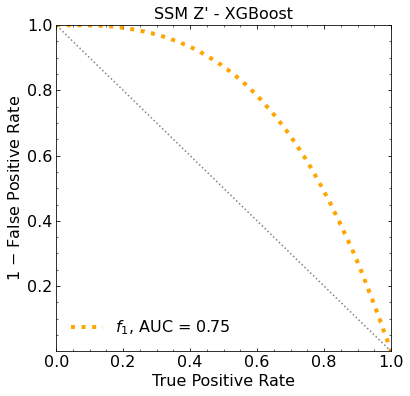


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67878	validation_1-logloss:0.67903
[1]	validation_0-logloss:0.66697	validation_1-logloss:0.66728
[2]	validation_0-logloss:0.65712	validation_1-logloss:0.65756
[3]	validation_0-logloss:0.64876	validation_1-logloss:0.64943
[4]	validation_0-logloss:0.64175	validation_1-logloss:0.64254
[5]	validation_0-logloss:0.63541	validation_1-logloss:0.63638
[6]	validation_0-logloss:0.63017	validation_1-logloss:0.63121
[7]	validation_0-logloss:0.62563	validation_1-logloss:0.62681
[8]	validation_0-logloss:0.62169	validation_1-logloss:0.62295
[9]	validation_0-logloss:0.61823	validation_1-logloss:0.61961
[10]	validation_0-logloss:0.61508	validation_1-logloss:0.61648
[11]	validation_0-logloss:0.61235	validation_1-logloss:0.61391
[12]	validation_0-logloss:0.60991	validation_1-logloss:0.61156
[13]	validation_0-logloss:0.60775	validation_1-logloss:0.60945
[14]	validation_0-logloss:0.60581	validation_1-logloss:0.60759
[15]	validation_0-logloss:0.60418	validation_1-logloss:0.60605
[1

[130]	validation_0-logloss:0.56780	validation_1-logloss:0.57415
[131]	validation_0-logloss:0.56775	validation_1-logloss:0.57414
[132]	validation_0-logloss:0.56771	validation_1-logloss:0.57414
[133]	validation_0-logloss:0.56767	validation_1-logloss:0.57413
[134]	validation_0-logloss:0.56763	validation_1-logloss:0.57411
[135]	validation_0-logloss:0.56759	validation_1-logloss:0.57410
[136]	validation_0-logloss:0.56753	validation_1-logloss:0.57410
[137]	validation_0-logloss:0.56744	validation_1-logloss:0.57405
[138]	validation_0-logloss:0.56742	validation_1-logloss:0.57404
[139]	validation_0-logloss:0.56740	validation_1-logloss:0.57405
[140]	validation_0-logloss:0.56736	validation_1-logloss:0.57404
[141]	validation_0-logloss:0.56732	validation_1-logloss:0.57403
[142]	validation_0-logloss:0.56728	validation_1-logloss:0.57403
[143]	validation_0-logloss:0.56724	validation_1-logloss:0.57402
[144]	validation_0-logloss:0.56719	validation_1-logloss:0.57402
[145]	validation_0-logloss:0.56715	valid

[259]	validation_0-logloss:0.56323	validation_1-logloss:0.57379
[260]	validation_0-logloss:0.56321	validation_1-logloss:0.57379
[261]	validation_0-logloss:0.56319	validation_1-logloss:0.57379
[262]	validation_0-logloss:0.56315	validation_1-logloss:0.57380
[263]	validation_0-logloss:0.56312	validation_1-logloss:0.57380
[264]	validation_0-logloss:0.56311	validation_1-logloss:0.57380
[265]	validation_0-logloss:0.56308	validation_1-logloss:0.57380
[266]	validation_0-logloss:0.56304	validation_1-logloss:0.57380
[267]	validation_0-logloss:0.56301	validation_1-logloss:0.57381
[268]	validation_0-logloss:0.56296	validation_1-logloss:0.57379
[269]	validation_0-logloss:0.56292	validation_1-logloss:0.57380
[270]	validation_0-logloss:0.56289	validation_1-logloss:0.57380
[271]	validation_0-logloss:0.56286	validation_1-logloss:0.57380
[272]	validation_0-logloss:0.56284	validation_1-logloss:0.57381
[273]	validation_0-logloss:0.56281	validation_1-logloss:0.57382


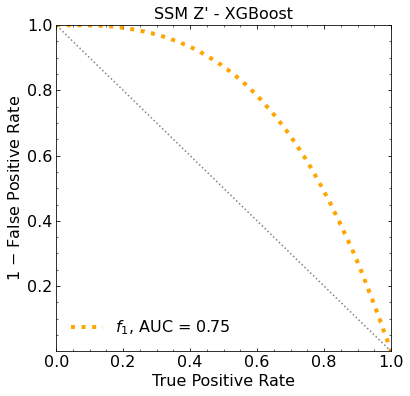


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67898	validation_1-logloss:0.67922
[1]	validation_0-logloss:0.66734	validation_1-logloss:0.66760
[2]	validation_0-logloss:0.65732	validation_1-logloss:0.65775
[3]	validation_0-logloss:0.64901	validation_1-logloss:0.64962
[4]	validation_0-logloss:0.64191	validation_1-logloss:0.64252
[5]	validation_0-logloss:0.63576	validation_1-logloss:0.63652
[6]	validation_0-logloss:0.63066	validation_1-logloss:0.63151
[7]	validation_0-logloss:0.62593	validation_1-logloss:0.62687
[8]	validation_0-logloss:0.62209	validation_1-logloss:0.62312
[9]	validation_0-logloss:0.61852	validation_1-logloss:0.61962
[10]	validation_0-logloss:0.61558	validation_1-logloss:0.61675
[11]	validation_0-logloss:0.61301	validation_1-logloss:0.61427
[12]	validation_0-logloss:0.61079	validation_1-logloss:0.61210
[13]	validation_0-logloss:0.60866	validation_1-logloss:0.61007
[14]	validation_0-logloss:0.60676	validation_1-logloss:0.60825
[15]	validation_0-logloss:0.60499	validation_1-logloss:0.60652
[1

[130]	validation_0-logloss:0.56797	validation_1-logloss:0.57424
[131]	validation_0-logloss:0.56788	validation_1-logloss:0.57420
[132]	validation_0-logloss:0.56784	validation_1-logloss:0.57419
[133]	validation_0-logloss:0.56782	validation_1-logloss:0.57419
[134]	validation_0-logloss:0.56777	validation_1-logloss:0.57418
[135]	validation_0-logloss:0.56771	validation_1-logloss:0.57419
[136]	validation_0-logloss:0.56767	validation_1-logloss:0.57419
[137]	validation_0-logloss:0.56764	validation_1-logloss:0.57419
[138]	validation_0-logloss:0.56760	validation_1-logloss:0.57419
[139]	validation_0-logloss:0.56759	validation_1-logloss:0.57419
[140]	validation_0-logloss:0.56754	validation_1-logloss:0.57419
[141]	validation_0-logloss:0.56751	validation_1-logloss:0.57419
[142]	validation_0-logloss:0.56748	validation_1-logloss:0.57419
[143]	validation_0-logloss:0.56744	validation_1-logloss:0.57420
[144]	validation_0-logloss:0.56739	validation_1-logloss:0.57419
[145]	validation_0-logloss:0.56735	valid

[259]	validation_0-logloss:0.56326	validation_1-logloss:0.57383
[260]	validation_0-logloss:0.56323	validation_1-logloss:0.57384
[261]	validation_0-logloss:0.56320	validation_1-logloss:0.57384
[262]	validation_0-logloss:0.56317	validation_1-logloss:0.57384
[263]	validation_0-logloss:0.56312	validation_1-logloss:0.57385
[264]	validation_0-logloss:0.56310	validation_1-logloss:0.57386
[265]	validation_0-logloss:0.56306	validation_1-logloss:0.57385
[266]	validation_0-logloss:0.56304	validation_1-logloss:0.57385
[267]	validation_0-logloss:0.56300	validation_1-logloss:0.57386
[268]	validation_0-logloss:0.56297	validation_1-logloss:0.57386
[269]	validation_0-logloss:0.56295	validation_1-logloss:0.57387
[270]	validation_0-logloss:0.56294	validation_1-logloss:0.57386
[271]	validation_0-logloss:0.56292	validation_1-logloss:0.57387
[272]	validation_0-logloss:0.56288	validation_1-logloss:0.57386
[273]	validation_0-logloss:0.56283	validation_1-logloss:0.57386
[274]	validation_0-logloss:0.56281	valid

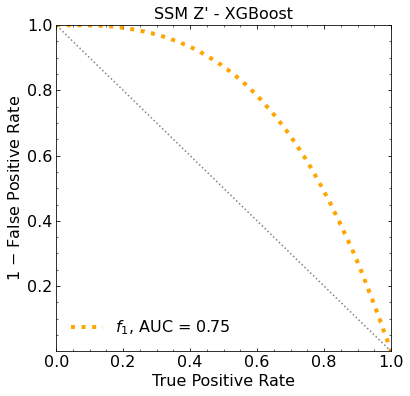


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67917	validation_1-logloss:0.67913
[1]	validation_0-logloss:0.66744	validation_1-logloss:0.66758
[2]	validation_0-logloss:0.65763	validation_1-logloss:0.65784
[3]	validation_0-logloss:0.64945	validation_1-logloss:0.64970
[4]	validation_0-logloss:0.64249	validation_1-logloss:0.64281
[5]	validation_0-logloss:0.63636	validation_1-logloss:0.63680
[6]	validation_0-logloss:0.63126	validation_1-logloss:0.63172
[7]	validation_0-logloss:0.62679	validation_1-logloss:0.62727
[8]	validation_0-logloss:0.62292	validation_1-logloss:0.62346
[9]	validation_0-logloss:0.61952	validation_1-logloss:0.62014
[10]	validation_0-logloss:0.61658	validation_1-logloss:0.61723
[11]	validation_0-logloss:0.61396	validation_1-logloss:0.61463
[12]	validation_0-logloss:0.61148	validation_1-logloss:0.61226
[13]	validation_0-logloss:0.60952	validation_1-logloss:0.61033
[14]	validation_0-logloss:0.60765	validation_1-logloss:0.60853
[15]	validation_0-logloss:0.60569	validation_1-logloss:0.60666
[1

[130]	validation_0-logloss:0.56901	validation_1-logloss:0.57453
[131]	validation_0-logloss:0.56897	validation_1-logloss:0.57453
[132]	validation_0-logloss:0.56895	validation_1-logloss:0.57452
[133]	validation_0-logloss:0.56887	validation_1-logloss:0.57448
[134]	validation_0-logloss:0.56883	validation_1-logloss:0.57449
[135]	validation_0-logloss:0.56881	validation_1-logloss:0.57448
[136]	validation_0-logloss:0.56878	validation_1-logloss:0.57448
[137]	validation_0-logloss:0.56876	validation_1-logloss:0.57447
[138]	validation_0-logloss:0.56868	validation_1-logloss:0.57441
[139]	validation_0-logloss:0.56863	validation_1-logloss:0.57439
[140]	validation_0-logloss:0.56859	validation_1-logloss:0.57439
[141]	validation_0-logloss:0.56854	validation_1-logloss:0.57437
[142]	validation_0-logloss:0.56849	validation_1-logloss:0.57437
[143]	validation_0-logloss:0.56846	validation_1-logloss:0.57438
[144]	validation_0-logloss:0.56844	validation_1-logloss:0.57438
[145]	validation_0-logloss:0.56840	valid

[259]	validation_0-logloss:0.56462	validation_1-logloss:0.57409
[260]	validation_0-logloss:0.56457	validation_1-logloss:0.57407
[261]	validation_0-logloss:0.56455	validation_1-logloss:0.57407
[262]	validation_0-logloss:0.56451	validation_1-logloss:0.57407
[263]	validation_0-logloss:0.56448	validation_1-logloss:0.57407
[264]	validation_0-logloss:0.56444	validation_1-logloss:0.57408
[265]	validation_0-logloss:0.56441	validation_1-logloss:0.57408
[266]	validation_0-logloss:0.56437	validation_1-logloss:0.57409
[267]	validation_0-logloss:0.56434	validation_1-logloss:0.57409
[268]	validation_0-logloss:0.56429	validation_1-logloss:0.57408
[269]	validation_0-logloss:0.56426	validation_1-logloss:0.57408
[270]	validation_0-logloss:0.56422	validation_1-logloss:0.57407
[271]	validation_0-logloss:0.56420	validation_1-logloss:0.57407
[272]	validation_0-logloss:0.56417	validation_1-logloss:0.57407
[273]	validation_0-logloss:0.56415	validation_1-logloss:0.57408
[274]	validation_0-logloss:0.56412	valid

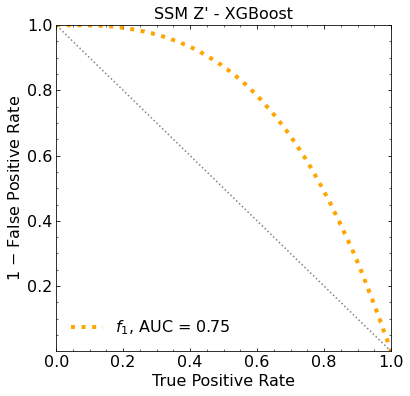


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67875	validation_1-logloss:0.67894
[1]	validation_0-logloss:0.66713	validation_1-logloss:0.66732
[2]	validation_0-logloss:0.65725	validation_1-logloss:0.65776
[3]	validation_0-logloss:0.64894	validation_1-logloss:0.64946
[4]	validation_0-logloss:0.64198	validation_1-logloss:0.64261
[5]	validation_0-logloss:0.63598	validation_1-logloss:0.63674
[6]	validation_0-logloss:0.63074	validation_1-logloss:0.63155
[7]	validation_0-logloss:0.62640	validation_1-logloss:0.62730
[8]	validation_0-logloss:0.62248	validation_1-logloss:0.62346
[9]	validation_0-logloss:0.61912	validation_1-logloss:0.62017
[10]	validation_0-logloss:0.61612	validation_1-logloss:0.61731
[11]	validation_0-logloss:0.61332	validation_1-logloss:0.61455
[12]	validation_0-logloss:0.61096	validation_1-logloss:0.61230
[13]	validation_0-logloss:0.60880	validation_1-logloss:0.61022
[14]	validation_0-logloss:0.60684	validation_1-logloss:0.60833
[15]	validation_0-logloss:0.60527	validation_1-logloss:0.60684
[1

[130]	validation_0-logloss:0.56826	validation_1-logloss:0.57432
[131]	validation_0-logloss:0.56822	validation_1-logloss:0.57429
[132]	validation_0-logloss:0.56809	validation_1-logloss:0.57422
[133]	validation_0-logloss:0.56806	validation_1-logloss:0.57421
[134]	validation_0-logloss:0.56801	validation_1-logloss:0.57417
[135]	validation_0-logloss:0.56798	validation_1-logloss:0.57417
[136]	validation_0-logloss:0.56792	validation_1-logloss:0.57414
[137]	validation_0-logloss:0.56787	validation_1-logloss:0.57412
[138]	validation_0-logloss:0.56783	validation_1-logloss:0.57412
[139]	validation_0-logloss:0.56777	validation_1-logloss:0.57409
[140]	validation_0-logloss:0.56772	validation_1-logloss:0.57409
[141]	validation_0-logloss:0.56770	validation_1-logloss:0.57409
[142]	validation_0-logloss:0.56766	validation_1-logloss:0.57408
[143]	validation_0-logloss:0.56762	validation_1-logloss:0.57406
[144]	validation_0-logloss:0.56757	validation_1-logloss:0.57405
[145]	validation_0-logloss:0.56754	valid

[259]	validation_0-logloss:0.56371	validation_1-logloss:0.57377
[260]	validation_0-logloss:0.56369	validation_1-logloss:0.57377
[261]	validation_0-logloss:0.56368	validation_1-logloss:0.57377
[262]	validation_0-logloss:0.56366	validation_1-logloss:0.57378
[263]	validation_0-logloss:0.56362	validation_1-logloss:0.57378
[264]	validation_0-logloss:0.56360	validation_1-logloss:0.57378
[265]	validation_0-logloss:0.56357	validation_1-logloss:0.57378
[266]	validation_0-logloss:0.56354	validation_1-logloss:0.57379
[267]	validation_0-logloss:0.56350	validation_1-logloss:0.57379
[268]	validation_0-logloss:0.56347	validation_1-logloss:0.57381
[269]	validation_0-logloss:0.56343	validation_1-logloss:0.57381
[270]	validation_0-logloss:0.56341	validation_1-logloss:0.57381
[271]	validation_0-logloss:0.56337	validation_1-logloss:0.57381
[272]	validation_0-logloss:0.56335	validation_1-logloss:0.57381
[273]	validation_0-logloss:0.56332	validation_1-logloss:0.57381
[274]	validation_0-logloss:0.56327	valid

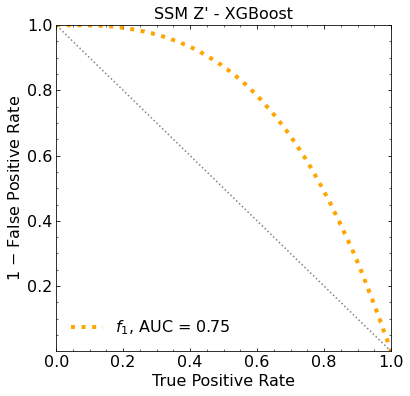


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67879	validation_1-logloss:0.67897
[1]	validation_0-logloss:0.66707	validation_1-logloss:0.66746
[2]	validation_0-logloss:0.65712	validation_1-logloss:0.65754
[3]	validation_0-logloss:0.64886	validation_1-logloss:0.64944
[4]	validation_0-logloss:0.64182	validation_1-logloss:0.64246
[5]	validation_0-logloss:0.63570	validation_1-logloss:0.63645
[6]	validation_0-logloss:0.63055	validation_1-logloss:0.63140
[7]	validation_0-logloss:0.62585	validation_1-logloss:0.62674
[8]	validation_0-logloss:0.62206	validation_1-logloss:0.62302
[9]	validation_0-logloss:0.61872	validation_1-logloss:0.61976
[10]	validation_0-logloss:0.61571	validation_1-logloss:0.61680
[11]	validation_0-logloss:0.61319	validation_1-logloss:0.61437
[12]	validation_0-logloss:0.61079	validation_1-logloss:0.61201
[13]	validation_0-logloss:0.60873	validation_1-logloss:0.61001
[14]	validation_0-logloss:0.60688	validation_1-logloss:0.60823
[15]	validation_0-logloss:0.60509	validation_1-logloss:0.60652
[1

[130]	validation_0-logloss:0.56846	validation_1-logloss:0.57422
[131]	validation_0-logloss:0.56843	validation_1-logloss:0.57422
[132]	validation_0-logloss:0.56841	validation_1-logloss:0.57422
[133]	validation_0-logloss:0.56838	validation_1-logloss:0.57422
[134]	validation_0-logloss:0.56835	validation_1-logloss:0.57422
[135]	validation_0-logloss:0.56831	validation_1-logloss:0.57422
[136]	validation_0-logloss:0.56827	validation_1-logloss:0.57422
[137]	validation_0-logloss:0.56823	validation_1-logloss:0.57419
[138]	validation_0-logloss:0.56817	validation_1-logloss:0.57418
[139]	validation_0-logloss:0.56814	validation_1-logloss:0.57417
[140]	validation_0-logloss:0.56810	validation_1-logloss:0.57417
[141]	validation_0-logloss:0.56808	validation_1-logloss:0.57417
[142]	validation_0-logloss:0.56803	validation_1-logloss:0.57417
[143]	validation_0-logloss:0.56800	validation_1-logloss:0.57417
[144]	validation_0-logloss:0.56790	validation_1-logloss:0.57411
[145]	validation_0-logloss:0.56781	valid

[259]	validation_0-logloss:0.56405	validation_1-logloss:0.57383
[260]	validation_0-logloss:0.56400	validation_1-logloss:0.57382
[261]	validation_0-logloss:0.56396	validation_1-logloss:0.57382
[262]	validation_0-logloss:0.56394	validation_1-logloss:0.57383
[263]	validation_0-logloss:0.56391	validation_1-logloss:0.57383
[264]	validation_0-logloss:0.56389	validation_1-logloss:0.57384
[265]	validation_0-logloss:0.56388	validation_1-logloss:0.57384
[266]	validation_0-logloss:0.56388	validation_1-logloss:0.57384
[267]	validation_0-logloss:0.56385	validation_1-logloss:0.57385
[268]	validation_0-logloss:0.56384	validation_1-logloss:0.57385
[269]	validation_0-logloss:0.56383	validation_1-logloss:0.57386
[270]	validation_0-logloss:0.56380	validation_1-logloss:0.57386
[271]	validation_0-logloss:0.56378	validation_1-logloss:0.57386
[272]	validation_0-logloss:0.56372	validation_1-logloss:0.57384
[273]	validation_0-logloss:0.56367	validation_1-logloss:0.57384
[274]	validation_0-logloss:0.56363	valid

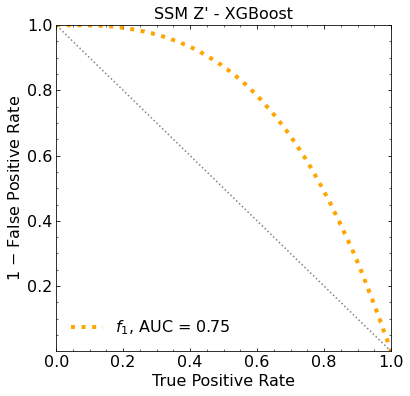


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67884	validation_1-logloss:0.67900
[1]	validation_0-logloss:0.66743	validation_1-logloss:0.66749
[2]	validation_0-logloss:0.65734	validation_1-logloss:0.65764
[3]	validation_0-logloss:0.64927	validation_1-logloss:0.64956
[4]	validation_0-logloss:0.64222	validation_1-logloss:0.64262
[5]	validation_0-logloss:0.63615	validation_1-logloss:0.63659
[6]	validation_0-logloss:0.63110	validation_1-logloss:0.63163
[7]	validation_0-logloss:0.62664	validation_1-logloss:0.62726
[8]	validation_0-logloss:0.62294	validation_1-logloss:0.62363
[9]	validation_0-logloss:0.61932	validation_1-logloss:0.62005
[10]	validation_0-logloss:0.61622	validation_1-logloss:0.61709
[11]	validation_0-logloss:0.61370	validation_1-logloss:0.61466
[12]	validation_0-logloss:0.61132	validation_1-logloss:0.61235
[13]	validation_0-logloss:0.60942	validation_1-logloss:0.61052
[14]	validation_0-logloss:0.60736	validation_1-logloss:0.60852
[15]	validation_0-logloss:0.60552	validation_1-logloss:0.60678
[1

[130]	validation_0-logloss:0.56888	validation_1-logloss:0.57428
[131]	validation_0-logloss:0.56884	validation_1-logloss:0.57428
[132]	validation_0-logloss:0.56881	validation_1-logloss:0.57427
[133]	validation_0-logloss:0.56877	validation_1-logloss:0.57426
[134]	validation_0-logloss:0.56872	validation_1-logloss:0.57425
[135]	validation_0-logloss:0.56869	validation_1-logloss:0.57425
[136]	validation_0-logloss:0.56868	validation_1-logloss:0.57424
[137]	validation_0-logloss:0.56865	validation_1-logloss:0.57424
[138]	validation_0-logloss:0.56859	validation_1-logloss:0.57420
[139]	validation_0-logloss:0.56852	validation_1-logloss:0.57418
[140]	validation_0-logloss:0.56849	validation_1-logloss:0.57417
[141]	validation_0-logloss:0.56843	validation_1-logloss:0.57415
[142]	validation_0-logloss:0.56839	validation_1-logloss:0.57413
[143]	validation_0-logloss:0.56836	validation_1-logloss:0.57413
[144]	validation_0-logloss:0.56834	validation_1-logloss:0.57413
[145]	validation_0-logloss:0.56830	valid

[259]	validation_0-logloss:0.56446	validation_1-logloss:0.57372
[260]	validation_0-logloss:0.56442	validation_1-logloss:0.57372
[261]	validation_0-logloss:0.56436	validation_1-logloss:0.57370
[262]	validation_0-logloss:0.56431	validation_1-logloss:0.57370
[263]	validation_0-logloss:0.56427	validation_1-logloss:0.57370
[264]	validation_0-logloss:0.56424	validation_1-logloss:0.57370
[265]	validation_0-logloss:0.56418	validation_1-logloss:0.57368
[266]	validation_0-logloss:0.56414	validation_1-logloss:0.57369
[267]	validation_0-logloss:0.56412	validation_1-logloss:0.57369
[268]	validation_0-logloss:0.56410	validation_1-logloss:0.57370
[269]	validation_0-logloss:0.56407	validation_1-logloss:0.57370
[270]	validation_0-logloss:0.56406	validation_1-logloss:0.57370
[271]	validation_0-logloss:0.56403	validation_1-logloss:0.57370
[272]	validation_0-logloss:0.56402	validation_1-logloss:0.57371
[273]	validation_0-logloss:0.56399	validation_1-logloss:0.57371
[274]	validation_0-logloss:0.56396	valid

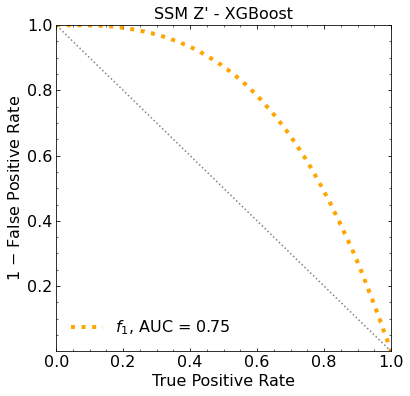


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67881	validation_1-logloss:0.67893
[1]	validation_0-logloss:0.66729	validation_1-logloss:0.66741
[2]	validation_0-logloss:0.65748	validation_1-logloss:0.65769
[3]	validation_0-logloss:0.64906	validation_1-logloss:0.64939
[4]	validation_0-logloss:0.64210	validation_1-logloss:0.64253
[5]	validation_0-logloss:0.63615	validation_1-logloss:0.63663
[6]	validation_0-logloss:0.63089	validation_1-logloss:0.63146
[7]	validation_0-logloss:0.62643	validation_1-logloss:0.62704
[8]	validation_0-logloss:0.62252	validation_1-logloss:0.62320
[9]	validation_0-logloss:0.61908	validation_1-logloss:0.61983
[10]	validation_0-logloss:0.61589	validation_1-logloss:0.61666
[11]	validation_0-logloss:0.61332	validation_1-logloss:0.61417
[12]	validation_0-logloss:0.61092	validation_1-logloss:0.61185
[13]	validation_0-logloss:0.60876	validation_1-logloss:0.60967
[14]	validation_0-logloss:0.60684	validation_1-logloss:0.60783
[15]	validation_0-logloss:0.60495	validation_1-logloss:0.60598
[1

[130]	validation_0-logloss:0.56872	validation_1-logloss:0.57419
[131]	validation_0-logloss:0.56866	validation_1-logloss:0.57417
[132]	validation_0-logloss:0.56862	validation_1-logloss:0.57417
[133]	validation_0-logloss:0.56857	validation_1-logloss:0.57417
[134]	validation_0-logloss:0.56854	validation_1-logloss:0.57417
[135]	validation_0-logloss:0.56849	validation_1-logloss:0.57414
[136]	validation_0-logloss:0.56845	validation_1-logloss:0.57414
[137]	validation_0-logloss:0.56842	validation_1-logloss:0.57415
[138]	validation_0-logloss:0.56838	validation_1-logloss:0.57415
[139]	validation_0-logloss:0.56832	validation_1-logloss:0.57411
[140]	validation_0-logloss:0.56827	validation_1-logloss:0.57411
[141]	validation_0-logloss:0.56825	validation_1-logloss:0.57411
[142]	validation_0-logloss:0.56822	validation_1-logloss:0.57410
[143]	validation_0-logloss:0.56818	validation_1-logloss:0.57409
[144]	validation_0-logloss:0.56812	validation_1-logloss:0.57407
[145]	validation_0-logloss:0.56807	valid

[259]	validation_0-logloss:0.56427	validation_1-logloss:0.57380
[260]	validation_0-logloss:0.56424	validation_1-logloss:0.57380
[261]	validation_0-logloss:0.56421	validation_1-logloss:0.57380
[262]	validation_0-logloss:0.56417	validation_1-logloss:0.57380
[263]	validation_0-logloss:0.56414	validation_1-logloss:0.57380


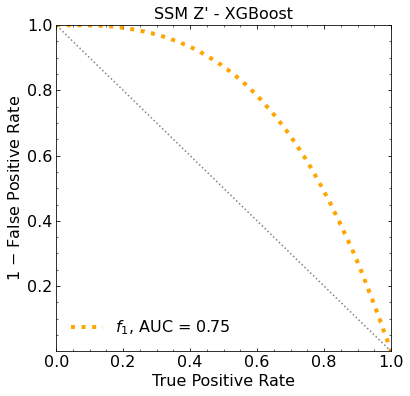


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.67889	validation_1-logloss:0.67912
[1]	validation_0-logloss:0.66725	validation_1-logloss:0.66755
[2]	validation_0-logloss:0.65738	validation_1-logloss:0.65793
[3]	validation_0-logloss:0.64895	validation_1-logloss:0.64958
[4]	validation_0-logloss:0.64192	validation_1-logloss:0.64267
[5]	validation_0-logloss:0.63600	validation_1-logloss:0.63682
[6]	validation_0-logloss:0.63088	validation_1-logloss:0.63187
[7]	validation_0-logloss:0.62642	validation_1-logloss:0.62746
[8]	validation_0-logloss:0.62255	validation_1-logloss:0.62368
[9]	validation_0-logloss:0.61910	validation_1-logloss:0.62030
[10]	validation_0-logloss:0.61607	validation_1-logloss:0.61739
[11]	validation_0-logloss:0.61327	validation_1-logloss:0.61472
[12]	validation_0-logloss:0.61093	validation_1-logloss:0.61249
[13]	validation_0-logloss:0.60865	validation_1-logloss:0.61028
[14]	validation_0-logloss:0.60687	validation_1-logloss:0.60857
[15]	validation_0-logloss:0.60499	validation_1-logloss:0.60677
[1

[130]	validation_0-logloss:0.56788	validation_1-logloss:0.57409
[131]	validation_0-logloss:0.56782	validation_1-logloss:0.57407
[132]	validation_0-logloss:0.56778	validation_1-logloss:0.57407
[133]	validation_0-logloss:0.56773	validation_1-logloss:0.57406
[134]	validation_0-logloss:0.56769	validation_1-logloss:0.57405
[135]	validation_0-logloss:0.56768	validation_1-logloss:0.57405
[136]	validation_0-logloss:0.56766	validation_1-logloss:0.57404
[137]	validation_0-logloss:0.56761	validation_1-logloss:0.57403
[138]	validation_0-logloss:0.56750	validation_1-logloss:0.57395
[139]	validation_0-logloss:0.56746	validation_1-logloss:0.57394
[140]	validation_0-logloss:0.56743	validation_1-logloss:0.57394
[141]	validation_0-logloss:0.56737	validation_1-logloss:0.57393
[142]	validation_0-logloss:0.56735	validation_1-logloss:0.57392
[143]	validation_0-logloss:0.56730	validation_1-logloss:0.57391
[144]	validation_0-logloss:0.56724	validation_1-logloss:0.57389
[145]	validation_0-logloss:0.56722	valid

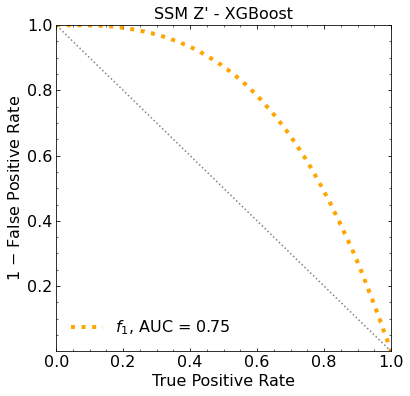


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


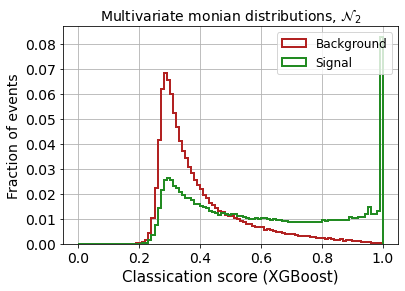

Classification score (10ML):


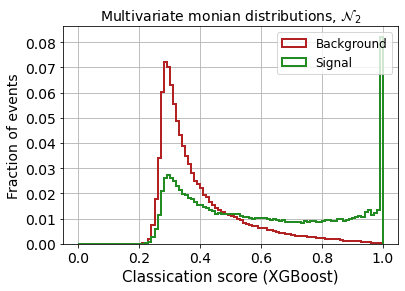

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [16]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]

[2, 5, 8, 12, 25, 37, 50, 125]


### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [18]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.3208596748173169
Z_bins_logbins :  0.35333552949344893

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  0.6292915897504067
Z_bins_logbins :  0.6688440733888285

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  0.869244515367665
Z_bins_logbins :  0.9093744487295391

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  1.1387648917195523
Z_bins_logbins :  1.1774872560354852

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  1.8349335595932335
Z_bins_logbins :  1.8666607070655359

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  2.3622753814262536
Z_bins_logbins :  2.38796269696020

In [19]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.3208596748173169, 0.6292915897504067, 0.869244515367665, 1.1387648917195523, 1.8349335595932335, 2.3622753814262536, 2.8696759567765784, 5.238955121307694]
[0.35333552949344893, 0.6688440733888285, 0.9093744487295391, 1.1774872560354852, 1.8666607070655359, 2.387962696960203, 2.8896478746826646, 5.235986115862493]


In [17]:
store_Z_bins = [0.3208596748173169, 0.6292915897504067, 0.869244515367665, 1.1387648917195523, 1.8349335595932335, 2.3622753814262536, 2.8696759567765784, 5.238955121307694]

store_Z_bins_logbins = [0.35333552949344893, 0.6688440733888285, 0.9093744487295391, 1.1774872560354852, 1.8666607070655359, 2.387962696960203, 2.8896478746826646, 5.235986115862493]

<ipython-input-20-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-20-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


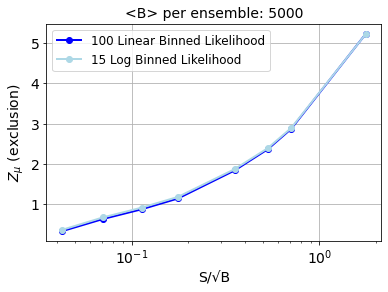

In [20]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.17143966520110107
Z_bins_XG_15bins :  0.08738555197421141
Z_bins_XG_15bins_1ML :  0.08479852356467477
Z_bins_XG_15bins_eq :  0.04723261863149366
Z_bins_XG_15bins_eq_1ML :  0.04711362256777155

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.4021799899927633
Z_bins_XG_15bins :  0.2166160362900232
Z_bins_XG_15bins_1ML :  0.21033880911442535
Z_bins_XG_15bins_eq :  0.11796392199878726
Z_bins_XG_15bins_eq_1ML :  0.11766725963789101

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  0.6098700355657922
Z_bins_XG_15bins :  0.34373336051351033
Z_bins_XG_15bins_1ML :  0.3339774733528508
Z_bins_XG_15bins_eq :  0.18855484468019093
Z_bins_XG_15bins_eq_1ML :  0.18808150127438922

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.17143966520110107, 0.4021799899927633, 0.6098700355657922, 0.8610512174346104, 1.5521514372532197, 2.090950863497181, 2.6122601756072417, 5.037864406271149]
[0.08738555197421141, 0.2166160362900232, 0.34373336051351033, 0.5101224291503662, 1.0289451618491603, 1.48216701035572, 1.9498903991075476, 4.3209427628604695]
[0.08479852356467477, 0.21033880911442535, 0.3339774733528508, 0.49602806782787445, 1.002738295093245, 1.4469056985054245, 1.906538155252122, 4.2501892358277615]
[0.04723261863149366, 0.11796392199878726, 0.18855484468019093, 0.282459185259245, 0.5859593477307617, 0.8638646531697944, 1.16255304527767, 2.840469701246884]
[0.04711362256777155, 0.11766725963789101, 0.18808150127438922, 0.28175178417607377, 0.5845029934764763, 0.8617324304179675, 1.1597047744464775, 2.8337886419447313]


In [18]:
store_Z_bins_XG = [0.17143966520110107, 0.4021799899927633, 0.6098700355657922, 0.8610512174346104, 1.5521514372532197, 2.090950863497181, 2.6122601756072417, 5.037864406271149]

store_Z_bins_XG_15bins = [0.08738555197421141, 0.2166160362900232, 0.34373336051351033, 0.5101224291503662, 1.0289451618491603, 1.48216701035572, 1.9498903991075476, 4.3209427628604695]
store_Z_bins_XG_15bins_1ML = [0.08479852356467477, 0.21033880911442535, 0.3339774733528508, 0.49602806782787445, 1.002738295093245, 1.4469056985054245, 1.906538155252122, 4.2501892358277615]

store_Z_bins_XG_15bins_eq = [0.04723261863149366, 0.11796392199878726, 0.18855484468019093, 0.282459185259245, 0.5859593477307617, 0.8638646531697944, 1.16255304527767, 2.840469701246884]
store_Z_bins_XG_15bins_eq_1ML = [0.04711362256777155, 0.11766725963789101, 0.18808150127438922, 0.28175178417607377, 0.5845029934764763, 0.8617324304179675, 1.1597047744464775, 2.8337886419447313]

<ipython-input-23-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-23-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-23-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-23-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and

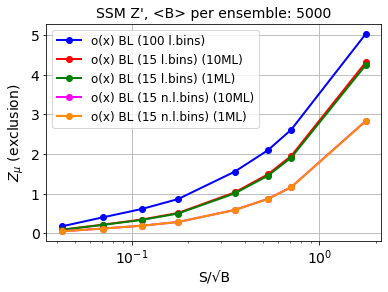

In [23]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf  9316.94794281
  9305.25462391  9269.67715525  9169.28873889  8936.50050773
  8503.18036093  7817.67920706  6843.68669568  5543.46752738
  3868.40933495  1721.50182088 -1047.72662722 -4354.04443685]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
  4209.63111235  4081.77959552  3919.65144779  3737.4847102
  3542.21794495  3340.41971618  3107.29356009  2845.15835914
  2500.7385069   2051.99862973  1461.38253998   711.95504912
  -225.68928699 -1335.34050449 -2625.51733629 -5044.7117548 ]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


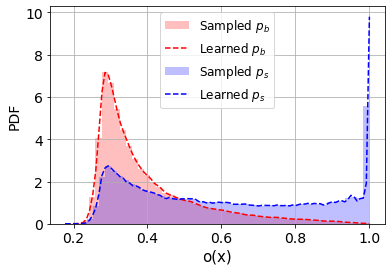


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



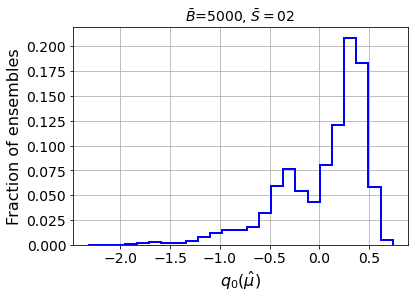

muhat mean:  0.04332843034250893
median q_muhat:  0.21534269270418616
Z_KDE:  0.4640503126862282
Z_KDE mu=0:  0.4640503126862282

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



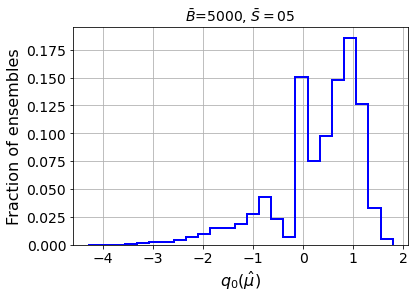

muhat mean:  0.15064116039520709
median q_muhat:  0.5701493237804893
Z_KDE:  0.7550823291406635
Z_KDE mu=0:  0.7550823291406635

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



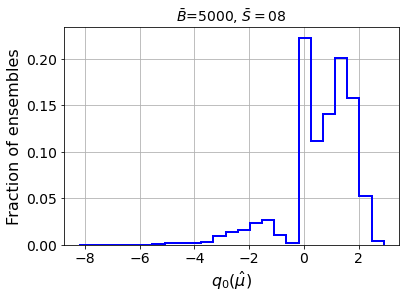

muhat mean:  0.19417700231238177
median q_muhat:  0.8883069121637153
Z_KDE:  0.9425003512804201
Z_KDE mu=0:  0.9425003512804201

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



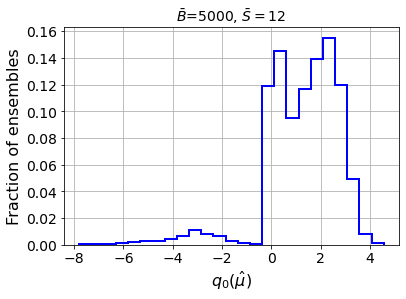

muhat mean:  0.19299978978347698
median q_muhat:  1.4972037511243492
Z_KDE:  1.2236027750558387
Z_KDE mu=0:  1.2236027750558387

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



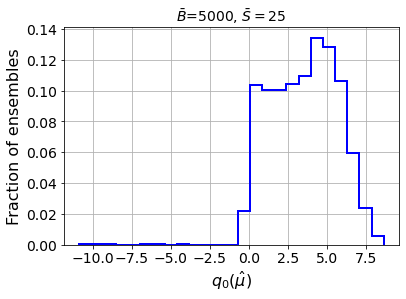

muhat mean:  0.14893751314958972
median q_muhat:  3.735552805088659
Z_KDE:  1.932757823703906
Z_KDE mu=0:  1.926698036067289

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



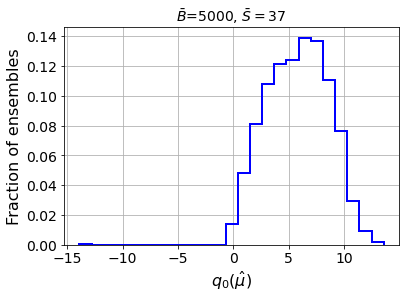

muhat mean:  0.10888234055988212
median q_muhat:  5.9132738760135055
Z_KDE:  2.431722409325025
Z_KDE mu=0:  2.423574295137626

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



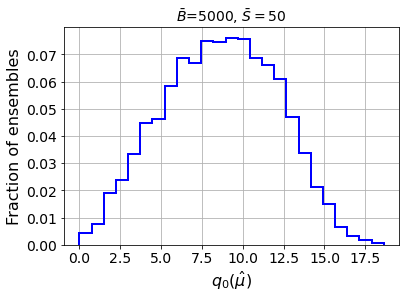

muhat mean:  0.08329827513672697
median q_muhat:  8.701248451298461
Z_KDE:  2.9497878654741365
Z_KDE mu=0:  2.9452474799044945

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



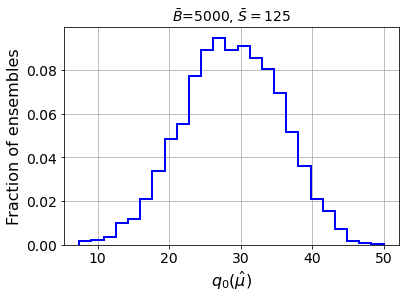

muhat mean:  0.046964586846543005
median q_muhat:  28.8920175216102
Z_KDE:  5.375129535333097
Z_KDE mu=0:  5.384554947803911

 ----------------------------------------- 



In [24]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [25]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.4640503126862282, 0.7550823291406635, 0.9425003512804201, 1.2236027750558387, 1.932757823703906, 2.431722409325025, 2.9497878654741365, 5.375129535333097]
[0.4640503126862282, 0.7550823291406635, 0.9425003512804201, 1.2236027750558387, 1.926698036067289, 2.423574295137626, 2.9452474799044945, 5.384554947803911]
[0.04332843034250893, 0.15064116039520709, 0.19417700231238177, 0.19299978978347698, 0.14893751314958972, 0.10888234055988212, 0.08329827513672697, 0.046964586846543005]


In [19]:
store_Z_MLL_KDE = [0.4640503126862282, 0.7550823291406635, 0.9425003512804201, 1.2236027750558387, 1.932757823703906, 2.431722409325025, 2.9497878654741365, 5.375129535333097]
store_Z_MLL_KDE_mu0 = [0.4640503126862282, 0.7550823291406635, 0.9425003512804201, 1.2236027750558387, 1.926698036067289, 2.423574295137626, 2.9452474799044945, 5.384554947803911]

store_muhat_mean_MLL = [0.04332843034250893, 0.15064116039520709, 0.19417700231238177, 0.19299978978347698, 0.14893751314958972, 0.10888234055988212, 0.08329827513672697, 0.046964586846543005]

##### For 1 ML

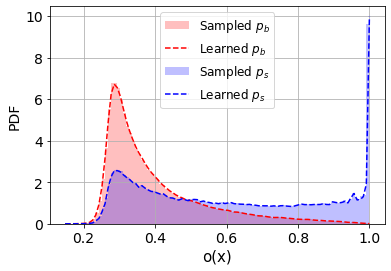


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.2501010104601248

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



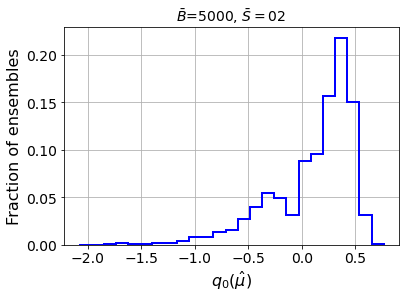

muhat mean:  0.04524059676402606
median q_muhat:  0.24981259675419265
Z_KDE:  0.49981256162104676
Z_KDE mu=0:  0.49981256162104676

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.5506246521983595

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



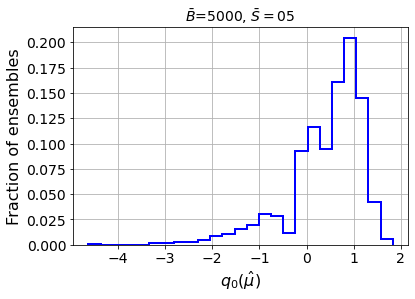

muhat mean:  0.1357157872608787
median q_muhat:  0.6375315082879407
Z_KDE:  0.7984557021450475
Z_KDE mu=0:  0.7984557021450475

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  0.8012179307814693

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



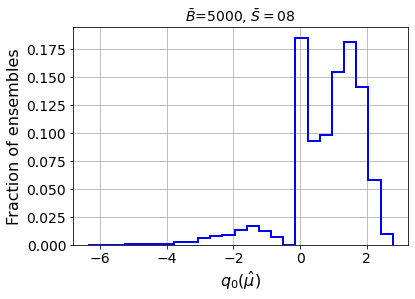

muhat mean:  0.1656506201387429
median q_muhat:  1.0763282492151607
Z_KDE:  1.0374624085792992
Z_KDE mu=0:  1.0374624085792992

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  1.0895951061786213

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



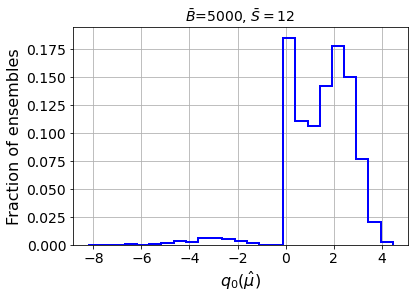

muhat mean:  0.16632331301240277
median q_muhat:  1.6964933691596222
Z_KDE:  1.3024950553302006
Z_KDE mu=0:  1.3024950553302006

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  1.8413465513343874

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



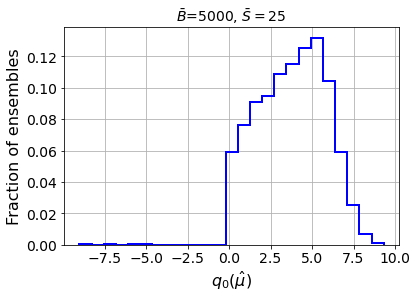

muhat mean:  0.11647380601725227
median q_muhat:  3.8924050808356867
Z_KDE:  1.9729179103134744
Z_KDE mu=0:  1.9727935348130456

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  2.407703827531443

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



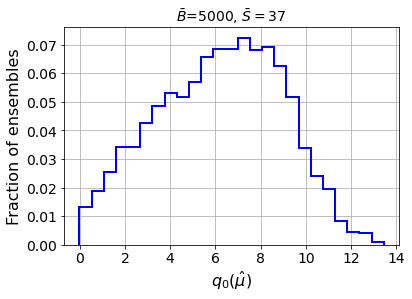

muhat mean:  0.08713954956851189
median q_muhat:  6.338604410318943
Z_KDE:  2.51765851741632
Z_KDE mu=0:  2.516229938460594

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  2.948284086108971

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



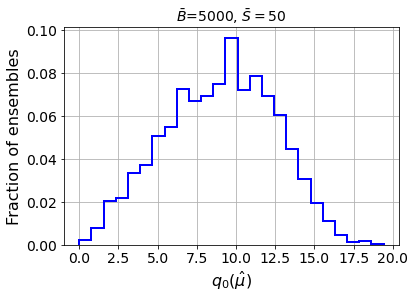

muhat mean:  0.07067732435843502
median q_muhat:  9.241118612830142
Z_KDE:  3.0399208234475683
Z_KDE mu=0:  3.0364092481542606

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  5.427648799876909

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



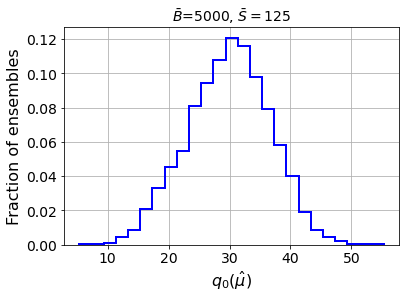

muhat mean:  0.03821669477234402
median q_muhat:  30.112013668622225
Z_KDE:  5.487441450131584
Z_KDE mu=0:  5.493291601887352

 ----------------------------------------- 



In [20]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

# bandwidth = np.logspace(-3.0, 0.05, 20)
# print(bandwidth)

# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
# print(grid.best_estimator_)

# SM_bandwidth_1ML = grid.best_estimator_.bandwidth
SM_bandwidth_1ML = 0.01329487353451575


# kde = KernelDensity(kernel='epanechnikov')
# grid = GridSearchCV(kde, {'bandwidth': bandwidth})
# grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
# print(grid.best_estimator_)

# NP_bandwidth_1ML = grid.best_estimator_.bandwidth
NP_bandwidth_1ML = 0.004386370005779536






# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM_1ML))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [21]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.2501010104601248, 0.5506246521983595, 0.8012179307814693, 1.0895951061786213, 1.8413465513343874, 2.407703827531443, 2.948284086108971, 5.427648799876909]
[0.49981256162104676, 0.7984557021450475, 1.0374624085792992, 1.3024950553302006, 1.9729179103134744, 2.51765851741632, 3.0399208234475683, 5.487441450131584]
[0.49981256162104676, 0.7984557021450475, 1.0374624085792992, 1.3024950553302006, 1.9727935348130456, 2.516229938460594, 3.0364092481542606, 5.493291601887352]
[0.04524059676402606, 0.1357157872608787, 0.1656506201387429, 0.16632331301240277, 0.11647380601725227, 0.08713954956851189, 0.07067732435843502, 0.03821669477234402]


In [ ]:
store_Z_KDE_bins = [0.2501010104601248, 0.5506246521983595, 0.8012179307814693, 1.0895951061786213, 1.8413465513343874, 2.407703827531443, 2.948284086108971, 5.427648799876909]

store_Z_MLL_KDE_1ML = [0.49981256162104676, 0.7984557021450475, 1.0374624085792992, 1.3024950553302006, 1.9729179103134744, 2.51765851741632, 3.0399208234475683, 5.487441450131584]
store_Z_MLL_KDE_mu0_1ML = [0.49981256162104676, 0.7984557021450475, 1.0374624085792992, 1.3024950553302006, 1.9727935348130456, 2.516229938460594, 3.0364092481542606, 5.493291601887352]

store_muhat_mean_MLL_1ML = [0.04524059676402606, 0.1357157872608787, 0.1656506201387429, 0.16632331301240277, 0.11647380601725227, 0.08713954956851189, 0.07067732435843502, 0.03821669477234402]

<ipython-input-22-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-22-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


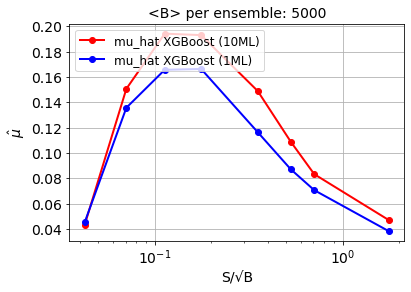

<ipython-input-22-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-22-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-22-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-22-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

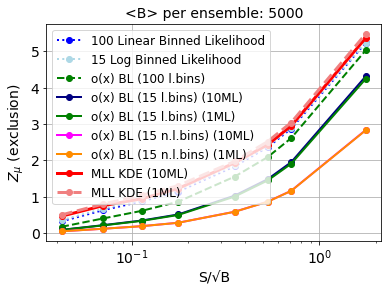

In [22]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [23]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [30]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.02833608651509726
WP:  0.5     S/B**0.5=  0.03743070108394216
WP:  0.75     S/B**0.5=  0.04819435688394523
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.07084021546227431
WP:  0.5     S/B**0.5=  0.09357647406757673
WP:  0.75     S/B**0.5=  0.12048489754090105
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.11334434077732518
WP:  0.5     S/B**0.5=  0.14972102100381204
WP:  0.75     S/B**0.5=  0.19277106157812857
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.1700165032411387
WP:  0.5     S/B**0.5=  0.22458198840550347
WP:  0.75     S/B**0.5=  0.28915412815267694
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.35420101539725146
WP:  0.5     S/B**0.5=  0.467871

In [24]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.02833608651509726, 0.07084021546227431, 0.11334434077732518, 0.1700165032411387, 0.35420101539725146, 0.5242175333334517, 0.7084020307945029, 1.7710040448162283]
SrootB_WP1_XG = [0.03743070108394216, 0.09357647406757673, 0.14972102100381204, 0.22458198840550347, 0.46787125859147227, 0.6924549447292798, 0.9357425171829445, 2.339334211013804]
SrootB_WP2_XG = [0.04819435688394523, 0.12048489754090105, 0.19277106157812857, 0.28915412815267694, 0.6023794046536715, 0.8915474017081022, 1.204758809307343, 3.011834425654431]

<ipython-input-25-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-25-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-25-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-25-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

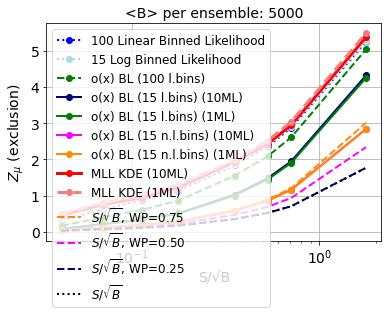

In [25]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-26-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


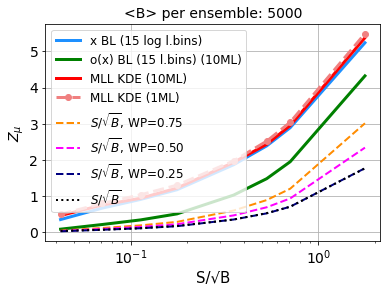

In [26]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

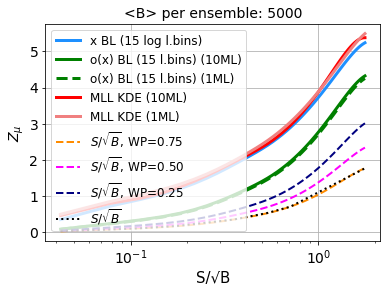

In [27]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [28]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [29]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3106
acceptance_SM = 0.4*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.612787
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)



np.savetxt('saved-models/results8500GeV-mumu.txt', [cross_bins_logbins_95CL,cross_bins_XG_15bins_95CL,cross_XG_MLL_95CL,cross_bins_XG_15bins_1ML_95CL,cross_XG_MLL_1ML_95CL])


correct_factor:  0.44726399999999994

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.29122830659391424 22.474550554312213 7.491516851437404e-06
0.5918089238131846 45.67083376025943 1.522361125341981e-05
0.27275531373392575 21.04896038151293 7.016320127170977e-06
0.6065734190117669 46.81023328371348 1.560341109457116e-05
0.2621942767530438 20.233948398959473 6.744649466319825e-06
